# Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [36]:
from __future__ import print_function, division

%matplotlib inline

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

import numpy as np
import pandas as pd

import random

import thinkstats2
import thinkplot
import statsmodels.formula.api as smf
# import regression
# import timeseries

## Exercises

**Exercise:**   The linear model I used in this chapter has the obvious drawback that it is linear, and there is no reason to expect prices to change linearly over time. We can add flexibility to the model by adding a quadratic term, as we did in Section 11.3.

Use a quadratic model to fit the time series of daily prices, and use the model to generate predictions. You will have to write a version of `RunLinearModel` that runs that quadratic model, but after that you should be able to reuse code from the chapter to generate predictions.

### Load data from file

In [9]:
# Solution goes here
transactions = pd.read_csv('mj-clean.csv', parse_dates=[5])
transactions.head()

,city,state,price,amount,quality,date,ppg,state.name,lat,lon
0,Annandale,VA,100,7.075,high,2010-09-02,14.13,Virginia,38.830345,-77.213870
1,Auburn,AL,60,28.300,high,2010-09-02,2.12,Alabama,32.578185,-85.472820
2,Austin,TX,60,28.300,medium,2010-09-02,2.12,Texas,30.326374,-97.771258
3,Belleville,IL,400,28.300,high,2010-09-02,14.13,Illinois,38.532311,-89.983521
4,Boone,NC,55,3.540,high,2010-09-02,15.54,North Carolina,36.217052,-81.687983


In [10]:
transactions.shape

(147070, 10)

In [51]:
df1 = transactions.groupby('quality')
df1.head()

,city,state,price,amount,quality,date,ppg,state.name,lat,lon
0,Annandale,VA,100,7.075,high,2010-09-02,14.13,Virginia,38.830345,-77.213870
1,Auburn,AL,60,28.300,high,2010-09-02,2.12,Alabama,32.578185,-85.472820
2,Austin,TX,60,28.300,medium,2010-09-02,2.12,Texas,30.326374,-97.771258
3,Belleville,IL,400,28.300,high,2010-09-02,14.13,Illinois,38.532311,-89.983521
4,Boone,NC,55,3.540,high,2010-09-02,15.54,North Carolina,36.217052,-81.687983
5,Boulder,CO,300,28.300,high,2010-09-02,10.60,Colorado,40.087835,-105.373507
9,Brooklyn,NY,60,3.540,medium,2010-09-02,16.95,New York,40.645099,-73.945032
12,Claymont,DE,20,3.540,medium,2010-09-02,5.65,Delaware,39.800945,-75.464550
13,Clearwater,FL,120,28.300,medium,2010-09-02,4.24,Florida,27.932797,-82.724763
16,Columbia,SC,70,28.300,low,2010-09-02,2.47,South Carolina,34.005992,-80.970766


### The following function takes the dataframe of transactions 

In [32]:
def GroupByDay(transactions, func=np.mean):
    ''' Groups transactions by day and compute the daily mean ppg
    transactions: Dataframe of transactions
    returns: Dataframe of daily prices
    '''
    grouped = transactions[['date','ppg']].groupby('date')
    daily = grouped.aggregate(func)
    
    daily['date'] = daily.index
    start = daily.date[0]
    one_year = np.timedelta64(1, 'Y')
    daily['years'] = (daily.date - start)/one_year
    
    return daily

In [33]:
 daily.head()

,ppg,date
date,,
2010-09-02,11.727733,2010-09-02
2010-09-03,11.972892,2010-09-03
2010-09-04,13.752500,2010-09-04
2010-09-05,15.113333,2010-09-05
2010-09-06,15.537500,2010-09-06


In [35]:
grp_daily = GroupByDay(transactions)
grp_daily.head()

,ppg,date,years
date,,,
2010-09-02,11.727733,2010-09-02,0.000000
2010-09-03,11.972892,2010-09-03,0.002738
2010-09-04,13.752500,2010-09-04,0.005476
2010-09-05,15.113333,2010-09-05,0.008214
2010-09-06,15.537500,2010-09-06,0.010952


In [52]:
def GroupByQualityAndDay(transactions):
    '''
    Divides transactions by quality and computes mean daily price
    transaction: Dataframe of transactions
    returns: map from quality to time series of ppg
    '''
    groups = transactions.groupby('quality')
    dailies = {}
    for name, group in groups:
        dailies[name] = GroupByDay(group)
        
    return dailies

In [60]:
grp_daily_quality = GroupByQualityAndDay(transactions)
grp_daily_quality['low']

,ppg,date,years
date,,,
2010-09-02,4.943750,2010-09-02,0.000000
2010-09-03,3.984138,2010-09-03,0.002738
2010-09-04,3.530000,2010-09-04,0.005476
2010-09-10,4.240000,2010-09-10,0.021903
2010-09-14,6.066118,2010-09-14,0.032855
...,...,...,...
2014-05-09,14.700000,2014-05-09,3.682485
2014-05-10,10.332857,2014-05-10,3.685223
2014-05-11,3.336667,2014-05-11,3.687961


In [37]:
def RunQuadraticModel(grp_daily):
    ''' 
    Runs a Non Linear Model of prices versus years
    grp_daily: Dataframe of daily prices
    returns: model, results
    '''
    grp_daily['years2'] = grp_daily.years**2
    model = smf.ols('ppg ~ years + years2', data=grp_daily)
    results = model.fit()
    return model, results

In [38]:
# Solution goes here
model, results = RunQuadraticModel(grp_daily)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ppg   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     103.6
Date:                Sun, 19 Jul 2020   Prob (F-statistic):           2.49e-42
Time:                        13:25:51   Log-Likelihood:                -1493.7
No. Observations:                1243   AIC:                             2993.
Df Residuals:                    1240   BIC:                             3009.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.2623      0.066    171.106      0.000      11.133      11.391
years         -0.1650      0.083     -1.988      0.047      -0.328      -0.002
years2        -0.0418      0.022     -1.884      0.060      -0.085       0.002
==============================================================================
Omnibus:                      187.232   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2494.368
Skew:                          -0.155   Prob(JB):                         0.00
Kurtosis:                       9.933   Cond. No.                         27.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
# Solution goes here
model, results = RunQuadraticModel(grp_daily_quality['high'])
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ppg   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     517.5
Date:                Sun, 19 Jul 2020   Prob (F-statistic):          4.57e-164
Time:                        15:11:22   Log-Likelihood:                -1497.4
No. Observations:                1241   AIC:                             3001.
Df Residuals:                    1238   BIC:                             3016.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.6980      0.067    205.757      0.000      13.567      13.829
years         -1.1171      0.084    -13.326      0.000      -1.282      -0.953
years2         0.1132      0.022      5.060      0.000       0.069       0.157
==============================================================================
Omnibus:                       49.112   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.885
Skew:                           0.199   Prob(JB):                     1.86e-25
Kurtosis:                       4.430   Cond. No.                         27.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
# Plot the fitted model with the data
def PlotFittedValues(model,results,label=''):
    '''
    Plots Original data and fitted values
    model: StatsModel model object
    results: StatsModel results object
    '''
    years = model.exog[:,1]
    values = model.endog
    thinkplot.Scatter(years,values, s=15, label=label)
    thinkplot.Plot(years, results.fittedvalues, label='model', color='#ff7f00')

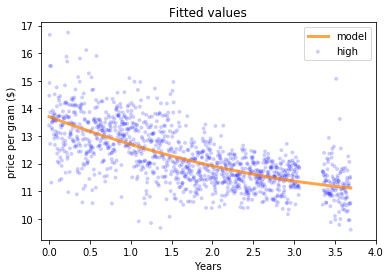

In [78]:
PlotFittedValues(model, results,label='high')
thinkplot.Config(title='Fitted values',
                xlabel='Years',
                xlim=[-0.1, 4],
                ylabel='price per gram ($)')

The simpliest way to generate predictions is to use the statsmodels to fit a model to the data, then use the predict method from the results

In [79]:
def GeneratePrediction(results, years):
    '''
    Genarates a simple prediction
    results: results object
    years: sequence of time(in years)
    
    returns: sequence of predicted values
    '''
    n = len(years)
    inter = np.ones(n)
    
    d = dict(Intercept=inter, years=years, years2=years**2)
    predict_df=pd.DataFrame(d)
    predict = results.predict(predict_df)
    
    return predict
    

In [80]:
def PlotPrediction(results, years):
    predict = GeneratePrediction(results, years)
    daily = grp_daily_quality['high']
    thinkplot.Scatter(daily.years, daily.ppg, alpha=0.2, label='high')
    thinkplot.plot(years, predict, color = '#ff7f00')
    xlim = years[0]-0.1, years[-1]+0.1
    thinkplot.Config(title = 'Predictions',
                    xlabel = 'Years',
                    xlim = xlim,
                    ylabel='Price per gram ($)',
                    loc='upper right')

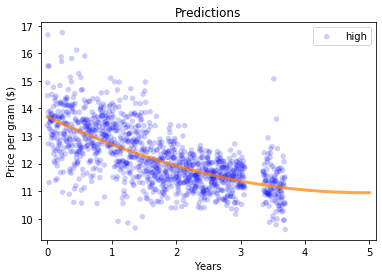

In [75]:
years = np.linspace(0, 5, 101)
PlotPrediction(results, years)

**Exercise:** Write a definition for a class named `SerialCorrelationTest` that extends `HypothesisTest` from Section 9.2. It should take a series and a lag as data, compute the serial correlation of the series with the given lag, and then compute the p-value of the observed correlation.

Use this class to test whether the serial correlation in raw price data is statistically significant. Also test the residuals of the linear model and (if you did the previous exercise), the quadratic model.

In [82]:
# Solution goes here
class SerialCorrelationTest(thinkstats2.HypothesisTest):
    ''' Tests serial correlations by permutation.'''
    
    def TestStatistic(self, data):
        ''' Computes the test statistics
        data: tuple of xs and ys
        '''
        series, lag = data
        test_stat = abs(thinkstats2.SerialCorr(series, lag))
        return test_stat
    
    def RunModel(self):
        ''' Run the model of the null hypothesis.
        returns: simulated data
        '''
        series, lag = self.data
        permutation = series.reindex(np.random.permutation(series.index))
        return permutation, lag

In [83]:
# Solution goes here
# Test the correlation between consecutive prices
daily = grp_daily_quality['high']

series = daily.ppg
test = SerialCorrelationTest((series, 1))
pvalue = test.PValue()
print(test.actual, pvalue)

0.4852293761947381 0.0


In [84]:
def RunLinearModel(grp_daily):
    ''' 
    Runs a Linear Model of prices versus years
    grp_daily: Dataframe of daily prices
    returns: model, results
    '''
    model = smf.ols('ppg ~ years', data=grp_daily)
    results = model.fit()
    return model, results

In [85]:
# Solution goes here
model_linear, results_linear = RunLinearModel(grp_daily_quality['high'])
results_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ppg   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     989.7
Date:                Sun, 19 Jul 2020   Prob (F-statistic):          3.69e-160
Time:                        15:33:59   Log-Likelihood:                -1510.1
No. Observations:                1241   AIC:                             3024.
Df Residuals:                    1239   BIC:                             3035.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.4496      0.045    296.080      0.000      13.361      13.539
years         -0.7082      0.023    -31.460      0.000      -0.752      -0.664
==============================================================================
Omnibus:                       56.254   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.992
Skew:                           0.252   Prob(JB):                     9.76e-29
Kurtosis:                       4.497   Cond. No.                         4.71
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
# Solution goes here
# Test for serial correlation in residuals of the linear model

series = results_linear.resid
test = SerialCorrelationTest((series, 1))
pvalue = test.PValue()
print(test.actual, pvalue)

0.0757047376750626 0.007


In [87]:
# Solution goes here
# Test for serial correlation in residuals of the quadratic model
series = results.resid
test = SerialCorrelationTest((series, 1))
pvalue = test.PValue()
print(test.actual, pvalue)

0.05607308161289921 0.046
